<a href="https://colab.research.google.com/github/entanglement-nak/portfolio-nak/blob/main/%E3%83%9D%E3%83%BC%E3%83%88%E3%83%95%E3%82%A9%E3%83%AA%E3%82%AA%E3%80%80CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from keras.optimizers import Adam
from keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# データパス
train_file_path = r"/content/drive/MyDrive/Wafer/Wafer_TRAIN.xlsx"

test_file_path = r"/content/drive/MyDrive/Wafer/Wafer_TEST.xlsx"

In [ ]:
# 訓練データとテストデータの読み込み
train_data = pd.read_excel(train_file_path)
test_data = pd.read_excel(test_file_path)

In [ ]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,143,144,145,146,147,148,149,150,151,152
0,1,-1.602294,-1.670823,-1.693666,-1.699377,-1.699377,-1.703660,-1.703660,-1.703660,-1.703660,...,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432
1,1,1.084591,1.084591,1.084591,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308,...,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308
2,1,0.362689,0.362689,0.362689,0.393316,0.362689,0.362689,0.362689,0.362689,0.362689,...,0.393316,0.393316,0.393316,0.362689,0.393316,0.393316,0.393316,0.393316,0.393316,0.393316
3,1,-1.094523,-1.094523,-1.094523,-1.096732,-1.094523,-1.096732,-1.094523,-1.094523,-1.094523,...,-1.096732,-1.096732,-1.096732,-1.096732,-1.096732,-1.096732,-1.096732,-1.096732,-1.096732,-1.096732
4,1,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,...,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761


In [ ]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,143,144,145,146,147,148,149,150,151,152
0,1,-1.079707,-1.083256,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,...,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707
1,1,-1.080197,-1.078021,-1.078021,-1.078021,-1.078021,-1.078021,-1.080197,-1.078021,-1.078021,...,-1.110670,-1.112846,-1.115023,-1.117199,-1.119376,-1.121553,-1.123729,-1.125906,-1.128082,-1.130259
2,1,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,...,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060
3,1,-1.658965,-1.696605,-1.705291,-1.711082,-1.711082,-1.715425,-1.715425,-1.715425,-1.715425,...,-1.149382,-1.149382,-1.149382,-1.149382,-1.149382,-1.149382,-1.149382,-1.149382,-1.149382,-1.149382
4,1,-1.201221,-1.199042,-1.199042,-1.201221,-1.199042,-1.199042,-1.199042,-1.199042,-1.199042,...,-1.185968,-1.183789,-1.181610,-1.179431,-1.177251,-1.175072,-1.172893,-1.170714,-1.168535,-1.166356


In [ ]:
# データの前処理
combined_data = pd.concat([train_data, test_data])
labels = combined_data.iloc[:, 0]
features = combined_data.iloc[:, 1:]
features = features.apply(pd.to_numeric, errors='coerce').fillna(0)

In [ ]:
# 特徴量の名前を文字列に変換
features.columns = features.columns.astype(str)

# 以降の処理は同じです
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)
# ...（以降のコードは変更なし）


In [ ]:
# 特徴量の正規化
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

In [ ]:
# 訓練データとテストデータの分割
X_train, X_test, y_train, y_test = train_test_split(features_normalized, labels, test_size=0.3, random_state=42)

In [ ]:
# 1次元CNNモデルの構築
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# モデルのコンパイル
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# データの形状調整
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
y_train_encoded = (y_train + 1) / 2
y_test_encoded = (y_test + 1) / 2

In [ ]:
# モデルの訓練
history = model.fit(X_train_reshaped, y_train_encoded, epochs=10, validation_data=(X_test_reshaped, y_test_encoded))

Epoch 1/10
157/157 [==============================] - 2s 11ms/step - loss: 0.0900 - accuracy: 0.9729 - val_loss: 0.0245 - val_accuracy: 0.9949
Epoch 2/10
157/157 [==============================] - 2s 10ms/step - loss: 0.0216 - accuracy: 0.9942 - val_loss: 0.0190 - val_accuracy: 0.9944
Epoch 3/10
157/157 [==============================] - 2s 11ms/step - loss: 0.0137 - accuracy: 0.9972 - val_loss: 0.0071 - val_accuracy: 0.9986
Epoch 4/10
157/157 [==============================] - 2s 11ms/step - loss: 0.0090 - accuracy: 0.9976 - val_loss: 0.0076 - val_accuracy: 0.9977
Epoch 5/10
157/157 [==============================] - 2s 12ms/step - loss: 0.0078 - accuracy: 0.9984 - val_loss: 0.0070 - val_accuracy: 0.9991
Epoch 6/10
157/157 [==============================] - 2s 14ms/step - loss: 0.0058 - accuracy: 0.9984 - val_loss: 0.0049 - val_accuracy: 0.9986
Epoch 7/10
157/157 [==============================] - 2s 12ms/step - loss: 0.0038 - accuracy: 0.9992 - val_loss: 0.0039 - val_accuracy: 0.9991

In [ ]:
# テストデータでの評価
y_pred = model.predict(X_test_reshaped)
y_pred = (y_pred > 0.5).astype(int).flatten()

68/68 [==============================] - 0s 4ms/step


In [ ]:
# 評価指標の計算
accuracy = accuracy_score(y_test_encoded, y_pred)
f1_macro = f1_score(y_test_encoded, y_pred, average='macro')
f1_weighted = f1_score(y_test_encoded, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Macro F1 Score: {f1_macro}')
print(f'Weighted F1 Score: {f1_weighted}')

Accuracy: 0.9995346672871103
Macro F1 Score: 0.9987988219623862
Weighted F1 Score: 0.9995342298047531


過学習していないかチェックを行う。

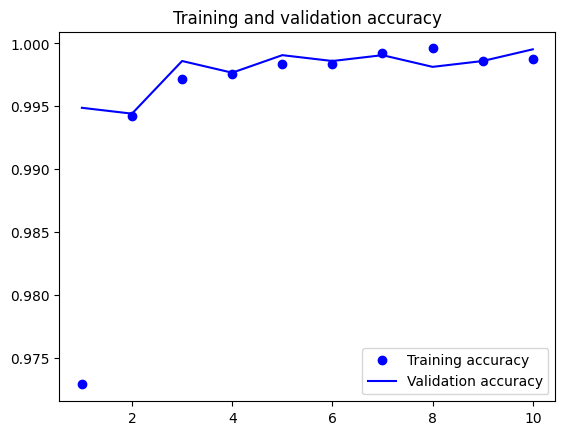

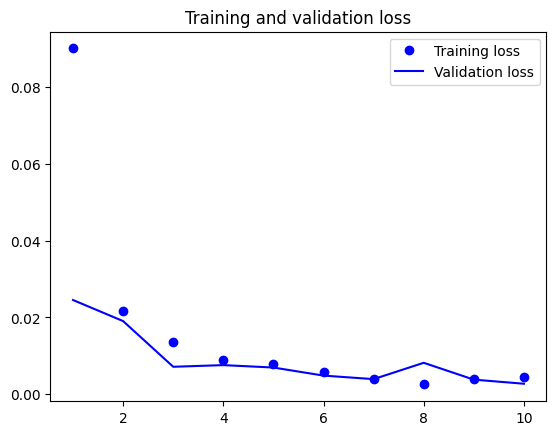

In [ ]:
import matplotlib.pyplot as plt

# 訓練中の精度と損失の履歴を取得
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# 訓練とテストの精度をプロット
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# 訓練とテストの損失をプロット
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()